In [1]:
import sys
sys.path.append(r'.\..')

In [2]:
import pandas as pd
import numpy as np
import os.path as osp
import random as rand
import networkx as nx
import matplotlib.pyplot as plt

from collections import defaultdict

from FinalCode.algorithms import dijkstra, astar
from FinalCode.Node import Node

In [3]:
def random_color() -> tuple[int, int, int]:
    return tuple([rand.random() * 255, rand.random() * 255, rand.random() * 255])

In [4]:
csvnodes = pd.read_csv(osp.join('.', 'nodes.csv'))
csvedges = pd.read_csv(osp.join('.', 'edges.csv'))
print(csvnodes.head())
csvedges

   name
0     0
1     1
2     2
3     3
4     4


,Id,node_start,node_end,weight
0,0,0,2,2.00
1,0,0,1,3.00
2,1,2,3,3.02
3,2,3,0,2.09
4,0,3,5,2.50
5,3,1,4,2.00
6,0,1,7,1.50
7,0,4,5,2.00
8,4,5,6,0.00
9,5,7,9,1.00


In [5]:
class MyNode(Node):
    def heuristic(self, other: Node) -> float:
        return 0
    

nodes = {str(row['name']): MyNode(str(int(row['name'])), color=random_color(), weight=rand.random())
                           for _, row in csvnodes.iterrows()}
edges = np.zeros((len(nodes), len(nodes)))

for _, edge in csvedges.iterrows():
    edges[int(edge['node_start']), int(edge['node_end'])] = edge['weight']
    edges[int(edge['node_end']), int(edge['node_start']),] = edge['weight']
    nodes[str(int(edge['node_start']))].neighbours.append(nodes[str(int(edge['node_end']))])

edges = pd.DataFrame(edges, index=list(nodes.keys()), columns=list(nodes.keys()))

print(nodes)
edges

{'0': <__main__.MyNode object at 0x00000212CBB20C50>, '1': <__main__.MyNode object at 0x00000212CBB20E30>, '2': <__main__.MyNode object at 0x00000212CBB20D10>, '3': <__main__.MyNode object at 0x00000212CBB20BF0>, '4': <__main__.MyNode object at 0x00000212CBB20AD0>, '5': <__main__.MyNode object at 0x00000212CBB20DD0>, '6': <__main__.MyNode object at 0x00000212CBB20CB0>, '7': <__main__.MyNode object at 0x00000212CBB20B90>, '8': <__main__.MyNode object at 0x00000212CBB20A70>, '9': <__main__.MyNode object at 0x00000212CBB20B30>}


,0,1,2,3,4,5,6,7,8,9
0,0.00,3.0,2.00,2.09,0.0,0.0,0.0,0.0,1.3,0.0
1,3.00,0.0,0.00,0.00,2.0,0.0,0.0,1.5,0.0,0.0
2,2.00,0.0,0.00,3.02,0.0,0.0,0.0,0.0,0.0,0.0
3,2.09,0.0,3.02,0.00,0.0,2.5,0.0,0.0,0.0,0.0
4,0.00,2.0,0.00,0.00,0.0,2.0,0.0,0.0,0.0,0.0
5,0.00,0.0,0.00,2.50,2.0,0.0,0.0,0.0,0.0,0.0
6,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4.0
7,0.00,1.5,0.00,0.00,0.0,0.0,0.0,0.0,3.0,1.0
8,1.30,0.0,0.00,0.00,0.0,0.0,0.0,3.0,0.0,0.0
9,0.00,0.0,0.00,0.00,0.0,0.0,4.0,1.0,0.0,0.0


In [6]:
path = dijkstra(list(nodes.values()), edges, nodes['0'], nodes['9'], do_UCS=True)
path

0                                              None
1    <__main__.MyNode object at 0x00000212CBB20C50>
2    <__main__.MyNode object at 0x00000212CBB20C50>
3    <__main__.MyNode object at 0x00000212CBB20D10>
4    <__main__.MyNode object at 0x00000212CBB20E30>
5    <__main__.MyNode object at 0x00000212CBB20AD0>
6                                              None
7    <__main__.MyNode object at 0x00000212CBB20E30>
8    <__main__.MyNode object at 0x00000212CBB20B90>
9    <__main__.MyNode object at 0x00000212CBB20B90>
dtype: object

In [16]:
path = astar(list(nodes.values()), edges, nodes['0'], nodes['9'], manhattan)
path

0                                              None
1    <__main__.MyNode object at 0x00000212CBB20C50>
2    <__main__.MyNode object at 0x00000212CBB20C50>
3    <__main__.MyNode object at 0x00000212CBB20D10>
4    <__main__.MyNode object at 0x00000212CBB20E30>
5    <__main__.MyNode object at 0x00000212CBB20AD0>
6                                              None
7    <__main__.MyNode object at 0x00000212CBB20E30>
8    <__main__.MyNode object at 0x00000212CBB20B90>
9    <__main__.MyNode object at 0x00000212CBB20B90>
dtype: object

In [9]:
shortest_path = [nodes['9']]
cur = path['9']
while cur != nodes['0']:
    shortest_path.append(cur)
    cur = path[cur.id]
shortest_path.append(nodes['0'])
shortest_path = list(reversed(shortest_path))

In [10]:
for node in shortest_path: print(node.id)

0
1
7
9


In [11]:
temp = defaultdict(list)
for _, edge in csvedges.iterrows():
    temp[int(edge['node_start'])].append(int(edge['node_end']))
temp

defaultdict(list,
            {0: [2, 1],
             2: [3],
             3: [0, 5],
             1: [4, 7],
             4: [5],
             5: [6],
             7: [9, 8],
             8: [0],
             9: [6]})

In [12]:
node_pos = {}

for _, row in csvnodes.iterrows():
    node_pos[int(row['name'])] = (2 + rand.random() * 3, 2 + rand.random() * 3)

node_pos

{0: (2.9905645963533374, 2.992443886311348),
 1: (3.867985193098287, 3.3985984322682206),
 2: (3.434233430338983, 4.267375626005146),
 3: (4.678545972859144, 4.15162329676036),
 4: (2.9942222237953864, 3.6294366472299933),
 5: (2.2050257813229903, 3.547277610027882),
 6: (3.0379995594344367, 2.1978510459193363),
 7: (4.247953711824879, 3.1170415989427007),
 8: (2.4226939459363726, 3.488174248497984),
 9: (2.1995029994843884, 3.888502313877432)}

In [13]:
nx_graph = nx.Graph(temp)
edge_labels = {}
for edge in list(nx_graph.edges()):
    edge_labels[edge] = edges[str(edge[1])][str(edge[0])]

In [14]:
edge_colors = {edge: (0, 0, 0) for edge in edge_labels}
highlight_edges = []
for i, node in enumerate(shortest_path):
    if i == (len(shortest_path) - 1): break
    edge_colors[(int(node.id), int(shortest_path[i + 1].id))] = (1, 1, 1)
    highlight_edges.append((int(node.id), int(shortest_path[i + 1].id)))

highlight_edges_color = [(1, 0, 0) for _ in range(len(highlight_edges))]

{(0, 2): Text(3.212398929208554, 3.629909514379479, '2.0'),
 (0, 1): Text(3.429268105338582, 3.1955180165091184, '3.0'),
 (0, 3): Text(3.8345436405901667, 3.572025595296158, '2.09'),
 (0, 8): Text(2.706638180237178, 3.2403012900920665, '1.3'),
 (2, 3): Text(4.056392969718858, 4.209499157365502, '3.02'),
 (3, 5): Text(3.4417927460571107, 3.849452131662209, '2.5'),
 (1, 4): Text(3.431124426246795, 3.514012066342555, '2.0'),
 (1, 7): Text(4.057954195569888, 3.2578313209686685, '1.5'),
 (4, 5): Text(2.599633424111345, 3.5883581094565393, '2.0'),
 (5, 6): Text(2.621505752958816, 2.872575534268945, '0.0'),
 (7, 9): Text(3.2237213494348333, 3.502774595000931, '1.0'),
 (7, 8): Text(3.3353265463922543, 3.30260737116486, '3.0'),
 (9, 6): Text(2.618752861487029, 3.0431734900737344, '4.0')}

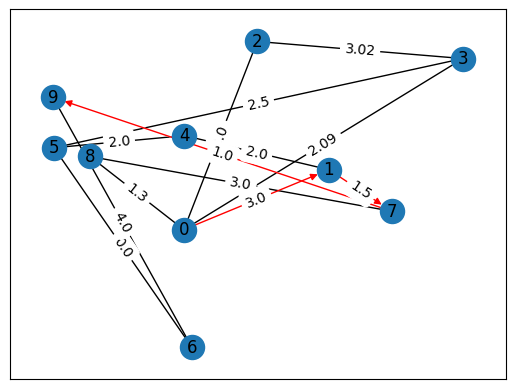

In [15]:
my_ax = plt.subplot()
# nx.draw_networkx(nx_graph, ax=my_ax)
nx.draw_networkx_nodes(nx_graph, node_pos, ax=my_ax)
nx.draw_networkx_labels(nx_graph, node_pos, ax=my_ax)
nx.draw_networkx_edges(nx_graph, node_pos,
                       edgelist=list(edge_colors.keys()), edge_color=list(edge_colors.values()), ax=my_ax)
nx.draw_networkx_edges(nx_graph, node_pos, highlight_edges,
                       edge_color=highlight_edges_color,
                       arrows=True, arrowstyle='-|>', ax=my_ax)
nx.draw_networkx_edge_labels(nx_graph, node_pos, edge_labels=edge_labels, ax=my_ax)

# plt.show() 